# <center> Introdução ao Pandas - Parte 2 </center>
___

<p align="center">
  <img src="https://nsee.maua.br/wp-content/uploads/2023/05/logo_nsee_white.svg",width=200, height=120/>
</p>

___

## Neste Notebook
1. [Pandas (Partes 2 e 3)](#pandas)
    1. [O que é o Pandas](#oqeh)
    2. [Básico do Pandas](#basico)
    3. [Objetos do Pandas](#objetos)
    4. [Carregando o conjunot de dados](#carregando)
    5. [Visualizações iniciais](#visualizacao)
    6. [Exercício 2.1](#exercicio1)
    7. [Filtrando (Filtering) e fatiando (slicing) os daos](#filtro)
    8. [Exercício 2.2](#exercicio2)

____

# <center> Objetivos de aprendizado </center>
- Familiarizar-se com as funcionalidades básicas do Pandas
- Ser capaz de carregar dados em um DataFrame
- Ser capaz de realizar manipulações básicas de dados

_____

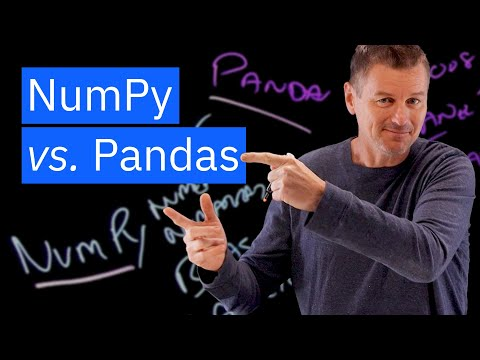

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('KHoEbRH46Zk', width=800, height=450)


<a name="pandas"></a>
# 2. Pandas

<a name="oqeh"></a>
## 2.1. O que é o Pandas?

Pandas é uma biblioteca *open source*, que proporciona estruturas de dados e ferramentas de análise de dados de alta performance e fáceis de usar para Python.

Em resumo, **Pandas fornece estrutura de dados especializadas e ferramentas para manipulação de dados**. Sua ótima performance, facilidade de uso e comunidade dedicada são as principais razões de sua vasta adoção entre cientistas de dados. 

Agora vamos começar a utilizá-lo! Se você está utilizando o Anaconda ou o Google Colab, já deve ter ele instalado. Senão, é possível achar os passos de instalação [neste link](https://pandas.pydata.org/) ou escreva os seguintes comandos no seu terminal: <br>
``` 
pip install pandas
```

<a name="basico"></a>
## 2.2. Básico de Pandas

Vamos relembrar as etapas da construção de um modelo de dados para entender a importância do Pandas:

1. Entendimento do problema / Definição do escopo
2. Definição do objetivo e métricas de avaliação
3. Determinação dos dados necessários
4. Aquisição dos dados
5. Tratamento e manipulação dos dados
6. Análise Exploratória dos Dados (E.D.A.)
7. Engenharia de Variáveis
8. Construção e avaliação do modelo
9. Interpretação dos resultados e apresentação dos dados
10. Deploy
11. Monitoramento e manutenção

Então, mas em quais etapas o Pandas é mais utilizado? Nas etapas 4 a 7 e 9! Ou seja, das 11 etapas, o Pandas pode nos ajudar em 5 delas! Isso mostra o quão poderosa essa biblioteca é, e por que utilizamos ela diariamente.

O Pandas é geralmente importado, assim como o NumPy, com o apelido ```pd```, como mostramos abaixo. Aproveitamos também para importar o NumPy, biblioteca que já apresentamos anteriormente.

In [ ]:
import pandas as pd
import numpy as np

<a name="objetos"></a>

## 2.3 Objetos do Pandas

Existem 2 principais tipos de objetos no Pandas: as [*Series*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) e os [*DataFrames*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#). As *Series* são sequências de uma dimensão  de elementos (para ser mais específico *ndarray*), todos do mesmo tipo de dados, com rótulos/índices (*labels*). São o objeto primário do Pandas, tudo vai funcionar baseado nelas. Para criar um objeto do tipo *Series*, podemos fazer o seguinte:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

Podemos ver acima que cada elemento da *Series* tem um index relacionado. Esses indexes podem ser tanto numéricos quanto de texto! Ao final do objeto temos a informação sobre o tipo de dados da *Series*: nesse caso, números *float64*.

O outro objeto principal do Pandas é o [*DataFrame*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame), que é basicamente uma coleção de *Series* com rótulos em comum. O *DataFrame* é bem parecido com uma tabela de Excel, com seus índices e colunas. Tanto suas linhas quanto suas colunas tem rótulos, nos permitindo acessar qualquer célula pela sua coordenada. Há diversas formas de criar um *DataFrame*, vamos começar com o mais simples:

In [ ]:
dates = pd.date_range('20210101', periods=6) # estamos criando uma lista de datas entre 01/01/2021 e 06/01/2021. Note que estamos usando uma função do Pandas
df = pd.DataFrame(
    np.random.randn(6, 4), # apenas números aleatórios nas células
    index=dates,  # especificando quais são os índices. Eles aceitam até datas como índice! Isso é muito bom para lidar com dados de séries temporais
    columns=['A','B','C','D']) # especificando como quero que sejam os nomes das colunas, passando uma lista de letras
df

Uma coisa boa do Pandas com os Notebooks é que eles mostram o *DataFrame* de uma forma bastante amigável. Podemos ver um *DataFrame* como um dicionário de listas, cada lista é uma coluna e cada chave do dicionário o título de cada coluna.
Tanto que podemos criar um *DataFrame* a partir de um dicionário:

In [ ]:
from random import randint
dict = {
        'A':[randint(0,10) for i in range(10)],
        'B':[randint(0,10) for i in range(10)],
        'C':[randint(0,10) for i in range(10)]                   
        }
df = pd.DataFrame(dict)
display(df)
print(f"A : {dict['A']}")


Agora que sabemos sobre as duas principais estruturas de dados do Pandas, podemos aprender sobre os principais métodos e funcionalidades dessa biblioteca, e para isso vamos utilizar dados reais sobre a franquia Pokémon.

## 2.4. Carregando o conjunto de dados

Um dos tipos de dados mais comuns para se guardar arquivos são os CSVs (comma-separated values, em português, valores separados por vírgulas). O Pandas tem diversas funções para transformar os mais variados tipos de arquivos em *DataFrames*, como csv, Excel, json e etc. Nesse exemplo, vamos usar o [leitor de csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Execute a célula abaixo para carregar os dados dos Pokémons.

In [ ]:
pkmn = pd.read_csv(
    'dados/pokemon_data.csv',   # copie e cole o caminho do arquivo
    sep=',')                    # o caracter utilizado para separar os valores, como é um arquivo csv, o separador é a vírgula
                                # se estivessemos lendo um arquivo Excel o separador seria o ponto e vírgula, por exemplo

## 2.5. Visualizações iniciais
Seria interessante saber algumas informações como: o que os dados contêm, como são as colunas, se tem valores nulos e etc. O Pandas tem 4 métodos principais para isso:

In [ ]:
pkmn.info()

A primeira coisa que é interessante de se fazer após ler um conjunto de dados em um *DataFrame* é utilizar o método ```info()```. Ele mostra informações como:
 - todas as colunas do DataFrame
 - o tipo de dado de cada coluna
 - a quantidade de valores não nulos de cada coluna 

Podemos ver que temos uma base sobre Pokémon, com 800 linhas com índices númericos de 0 a 799, 13 colunas de três tipos de dados diferentes, usando cerca de ~76kB de memória RAM. As informações presentes sobre os Pokémons são o número, o nome, o tipo (alguns têm subtipo, mas não todos, por isso os dados faltantes na coluna *Type 2*), estatísticas de ataque, defesa e velocidade, a geração (novos Pokémons são apresentados a cada alguns anos, e cada grupo é conhecido por uma geração) e a indicação se ele é lendário (como uma espécie mística). <br> Todas essas informações a gente conseguiu descobrir com apenas uma linha de código! Vamos então ver como o *DataFrame* realmente é. Temos dois métodos para isso:

Primeiro, temos o método ```head()```, que mostra, por padrão, as 5 primeiras linhas do *DataFrame*. Podemos passar um número como parâmetro para mostrar mais linhas se precisássemos

In [ ]:
pkmn.head()

Também temos o método ```tail()```, que é basicamente o inverso do ```head()```, mostrando as últimas linhas do *DataFrame*. Por padrão, ele mostra as últimas 5 linhas, mas também podemos passar um número como parâmetro para mostrar mais linhas.

In [ ]:
pkmn.tail()

Por fim, o método ```describe()``` na sua forma padrão mostra um resumo estatístico de todas as colunas numéricas. É um método bom para ter uma ideia inicial sobre o que ocorre nas colunas de uma perspectiva estatística.


In [ ]:
pkmn.describe()

Fique atento, por que nem tudo tem um sentido estátístico válido, por exemplo, o que a média do número dos pokemóns nos diz sobre o nosso dataset? Nada! Por isso, é importante entender o que cada coluna significa no seu DataFrame.

In [ ]:
type(pkmn.describe())

Perceba também, que o describe nos retorna um DataFrame, ou seja, podemos acessar as informações da mesma forma que acessamos as colunas do nosso DataFrame original.

## Exercício 2.1
Use o arquivo de jogadores do FIFA Ultimate Team para os exercícios de Pandas. Caso você não conheça, o Ultimate Team (FUT) é um modo de jogo do FIFA (um videogame de futebol). Cada jogador pode apresentar diferentes níveis de habilidade em algumas características, como "drible", "chute", "passe", entre outras.  <br>
Substitua os \____ abaixo para ler o arquivo e siga as instruções para ter as visualizações iniciais.

In [ ]:
# leia o arquivo (tente abrir num editor de texto antes para verificar o separador)
fut_players = ____

# mostre as primeiras 10 linhas de dados
fut_players.____

In [ ]:
# mostre as últimas 10 linhas de dados
fut_players.____

In [ ]:
# use o método .info() no DataFrame
fut_players.____

In [ ]:
# mostre o resumo estatístico das colunas numéricas
fut_players.____

<a name="filtro"></a>

## 2.6. Filtrando (*Filtering*) e fatiando (*slicing*) os dados

*Filtering* e *slicing* são técnicas utilizadas para isolar partes específicas do *DataFrame*, sejam linhas, colunas ou células. Isso é muito útil pois diversas vezes queremos analisar alguns dados ao invés da base inteira. O Pandas tem ferramentas próprias para isso. <br>

### 2.6.1. *Slicing*

No Pandas existem duas principais formas de fatiar os dados, isto é, selecionar apenas uma parte de acordo com as linhas e colunas do *DataFrame*: utilizando o nome das partes ou com os métodos ```.loc()``` e ```.iloc()```. Vamos começar pelo primeiro. Para fazer isso, imagine que queremos apenas os nomes e o poder de ataque dos Pokémons e veja o exemplo:

In [ ]:
pkmn[['Name','Attack']].head(7)

 Foram utilizadas chaves duplas ```[[]]``` no fatiamento. Ao fazer isso, estou explicitando que quero um objeto do tipo *DataFrame*. Se eu quisesse objetos do tipo *Series* usaria chaves simples. Podemos ver um exemplo disso abaixo:

In [ ]:
type(pkmn[['Name']])

In [ ]:
type(pkmn['Name'])

Outra forma de se obter um objeto do tipo *Series* é passando a coluna como se fosse um atributo do *DataFrame*:

In [ ]:
pkmn.Name

O único problema desse formato é que colunas cujo nome contém espaços não funcionarão, como é o caso das colunas *Type 1*, *Type 2*, *Sp. Atk* e *Sp. Def*. Para resolver isso, vamos renomeá-las com o método *.rename()*.

In [ ]:
pkmn.rename(
    columns={'Type 1':'Type_1', 'Type 2':'Type_2', 'Sp. Atk':'Sp_Atk','Sp. Def':'Sp_Def'}, # passando o nome antigo e novo como um dicionário
    inplace = True # algumas operações com Pandas criam uma cópia do DataFrame e não alteram o objeto em si, alteramos isso mudando o parâmetro inplace para verdadeiro
)

In [ ]:
pkmn.info()

Agora que os nomes foram trocados, podemos obter um objeto *Series* do tipo do Pokémon como a seguir:

In [ ]:
pkmn.Type_1

Outra forma de selecionar partes dos dados é usando os métodos *.loc()* e *.iloc()*.<br>

Para usar a localização númerica utilizamos o *iloc*. Como você pode imaginar, as linhas e colunas são ordenadas por números inteiros sequenciais, começando do 0, como nas listas. Dessa forma, se você sabe o número da linha e da coluna, você pode usar o *iloc*.<br>

Por exemplo, se quisermos a coluna HP, que é a 6ª, poderíamos fazer o seguinte:

In [ ]:
pkmn.iloc[:,5].head()

A sintaxe do *iloc* é como [x,y], que significa que queremos a (x+1)ª linha e (y+1)ª coluna. Se utilizarmos ```:``` no lugar de x ou y significa que queremos a coluna ou linha completa, respectivamente. Vamos pegar o HP do Bulbasaur, o primeiro Pokémon do nosso *DataFrame*:

In [ ]:
print("O HP do Bulbasaur é "+str(pkmn.iloc[0,5]))

Agora vamos pegar todas as estadísticas do Venosaur o 3º Pokémon do nosso *DataFrame*:

In [ ]:
pkmn.iloc[2,:]

O método *.loc()* usa o rótulo para acessar os valores. Dessa forma, ao invés de passarmos as coordenadas numéricas, passamos o nome da linha e da coluna, como a seguir:

In [ ]:
pkmn.loc[0, 'Name']

No caso, os rótulos das linhas são iguais às suas coordenadas, por isso ficou parecido com o *iloc*. Vamos fazer o teste com as colunas também para ver a diferença. Abaixo pegaremos novamente o HP do Bulbasaur:

In [ ]:
print("O HP do Bulbasaur é "+str(pkmn.loc[0,'HP']))

### 2.6.2. Filtros (*Filtering*)

Uma vez sabendo isolar partes do *DataFrame* de acordo com a localização dos dados, podemos partir para isolar de acordo com condições, ou seja, filtrar os dados.
Para conseguir fazer isso no Pandas, fazemos o seguinte: passamos uma expressão condicional e o Pandas retorna apenas as partes que teriam a condição como verdade. Para testar isso, vamos ver a defesa média de todos os Pokémons e depois ver se os tipos 'Rock' e 'Steel' têm defesas maiores:

In [ ]:
pkmn.Defense.mean() # note que operações comuns como média (mean), mediana (median) e soma (sum) são métodos do Pandas

In [ ]:
pkmn.loc[pkmn.Type_1=='Rock'].Defense.mean()

In [ ]:
pkmn[pkmn.Type_1=='Steel'].Defense.mean()

De fato, parece que os tipos selecionados tem média acima dos demais Pokémons. Para verificar isso, passamos a condição pkmn.Type_1=='Steel' entre colchetes, o que retorna apenas as linhas de tal tipo. Com isso, selecionamos apenas a coluna de defesa e calculamos a média. <br>
Vamos ver agora os Pokémons com defesa maior que 150, cujo tipo principal não é 'Rock' nem 'Steel':

In [ ]:
pkmn[(pkmn.Defense > 150)&(pkmn.Type_1!='Rock')&(pkmn.Type_1!='Steel')]

Podemos ver acima que é possível juntar condições com os operadores E (&) e OU (|).<br>
Vamos dizer agora que você quer apenas alguns Pokémons em específico, por exemplo Venusaur, Charizard e Blastoise. Criar uma condição para cada e uní-las com o operador & pode ser difícil, ainda mais se for uma quantidade grande de opções. Podemos facilitar isso passando uma tupla ao método *.isin()*, como abaixo:

In [ ]:
aux = ('Venusaur', 'Charizard', 'Blastoise')
pkmn[pkmn.Name.isin(aux)]

Finalmente, podemos criar novos *DataFrames* a partir de um já existente selecionando apenas algumas linhas ou colunas dele:

In [ ]:
estatisticas_ataq = pkmn[['#','Name','Attack','Sp_Atk','Speed']] # selecionando apenas estatísticas ofensivas
estatisticas_def = pkmn[['#','Name', 'HP','Defense','Sp_Def']] # selecionando apenas estatísticas defensivas

In [ ]:
estatisticas_ataq.head()

In [ ]:
estatisticas_def.head()

In [ ]:
pkm_fogo = pkmn[(pkmn.Type_1=='Fire')|(pkmn.Type_2=='Fire')] # filtrando apenas linhas com algumas condições
pkm_fogo.head()

In [ ]:
pkm_agua = pkmn[(pkmn.Type_1=='Water')|(pkmn.Type_2=='Water')] # filtrando apenas linhas com algumas condições
pkm_agua.head()

## Exercício 2.2
Siga as instruções e substitua os \____ para exercitar o que aprendemos.

In [ ]:
# mostre as 5 primeiras linhas das colunas player_name, position e nationality
fut_players[[____]].____

In [ ]:
# renomeie as colunas player_id, player_name e player_extended_name para id, name e extended_name, respectivamente
fut_players.rename(
    columns={____, ____, ____},
    inplace = True
)

fut_players.info()

In [ ]:
# salve nas variáveis ext_name_4534_a e ext_name_4534_b a coluna extended_name do 4534º jogador
# (atenção: não queremos o jogador de id = 4534) usando loc e iloc
ext_name_4534_a = fut_players.iloc____
ext_name_4534_b = fut_players.loc____
print(ext_name_4534_a)
print(ext_name_4534_b)

In [ ]:
# nosso DataFrame tem muitas colunas
# crie outro DataFrame (fut_players_2) apenas com as colunas na lista abaixo
selected_columns = ['id', 'name', 'overall', 'nationality', 'position', 'pref_foot', 'base_id']

fut_players_2 = ____

fut_players_2.info()

In [ ]:
# queremos ver os melhores jogadores nascidos no Brasil (Brazil), isto é, aqueles com médio (overall) acima de 90
# mostre os 15 primeiros
aux_1 = fut_players_2[____]
aux_1.head(15)

In [ ]:
# vários jogadores bons!
# agora mostre os jogadores brasileiros que sejam canhotos (pref_foot é Left) ou brasileiros que sejam goleiros (position é GK)
aux_2 = fut_players_2[____]
aux_2.head(20)

## Esse notebook não teve nenhum exercício que precise de correção